In [244]:
### Linear Regression, Data Cleaning, and Feature Engineering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [245]:
## Loading Data
data_url = "./kc_house_data.csv"
kc_data = pd.read_csv(data_url)

print(kc_data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [246]:
## Data Cleaning
from scipy import stats

kc_data = kc_data.dropna(axis=0)
print(kc_data)

               id        date      price  bedrooms  bathrooms  sqft_living  \
1      6414100192   12/9/2014   538000.0         3       2.25         2570   
3      2487200875   12/9/2014   604000.0         4       3.00         1960   
4      1954400510   2/18/2015   510000.0         3       2.00         1680   
5      7237550310   5/12/2014  1230000.0         4       4.50         5420   
6      1321400060   6/27/2014   257500.0         3       2.25         1715   
...           ...         ...        ...       ...        ...          ...   
21591  2997800021   2/19/2015   475000.0         3       2.50         1310   
21592   263000018   5/21/2014   360000.0         3       2.50         1530   
21593  6600060120   2/23/2015   400000.0         4       2.50         2310   
21594  1523300141   6/23/2014   402101.0         2       0.75         1020   
21596  1523300157  10/15/2014   325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_abo

In [247]:
kc_df = pd.DataFrame(kc_data, columns=kc_data.columns)
print("Old Shape: ", kc_df.shape)

Old Shape:  (15762, 21)


In [248]:
zscore = np.abs(stats.zscore(kc_df['price']))
print("ZScore: ", zscore)

ZScore:  [0.00891201 0.16840532 0.08413755 ... 0.37966644 0.37402184 0.58116341]


In [249]:
threshold_z = 2
outlier_inds = np.where(threshold_z > zscore)[0]
print(outlier_inds)

[    0     1     2 ... 15759 15760 15761]


In [250]:

kc_df.drop(index=outlier_inds, inplace=True, errors='ignore')
print("New Shape: ", kc_df.shape)

New Shape:  (4684, 21)


In [251]:
## Feature Engineering
y = kc_df['price']

# Create new numerical feature - age of house based on year built
current_year = 2025
kc_df['age'] = kc_df.apply(lambda row: current_year - row['yr_built'], axis=1)

kc_features = ['age', 'waterfront', 'bedrooms', 'bathrooms', 'sqft_living']

x = kc_df[kc_features]
x.describe()

,age,waterfront,bedrooms,bathrooms,sqft_living
count,4684.000000,4684.000000,4684.000000,4684.000000,4684.000000
mean,44.816823,0.007899,3.396456,2.243435,2150.249573
std,30.243128,0.088535,1.004026,0.773864,935.848704
min,10.000000,0.000000,1.000000,0.750000,380.000000
25%,18.000000,0.000000,3.000000,1.750000,1450.000000
50%,37.000000,0.000000,3.000000,2.500000,1970.000000
75%,66.000000,0.000000,4.000000,2.500000,2680.000000
max,125.000000,1.000000,33.000000,6.750000,9640.000000


In [252]:
y.describe()

count    4.684000e+03
mean     5.528764e+05
std      3.642785e+05
min      8.300000e+04
25%      3.350000e+05
50%      4.600000e+05
75%      6.500000e+05
max      4.670000e+06
Name: price, dtype: float64

In [253]:
x.head()

,age,waterfront,bedrooms,bathrooms,sqft_living
16,31,0.0,3,2.00,1890
39,29,0.0,4,2.50,2620
51,59,0.0,5,2.50,3150
94,86,0.0,3,1.50,1580
112,45,0.0,3,1.75,1540


In [254]:
## Model Training

# Split the datasets into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [255]:
x_test.head()

,age,waterfront,bedrooms,bathrooms,sqft_living
16787,99,0.0,2,1.00,1010
18114,20,0.0,3,3.25,1280
20253,13,0.0,3,2.50,1741
17636,37,0.0,3,2.50,1910
20616,16,0.0,3,2.75,1430


In [256]:
x_train.head()

,age,waterfront,bedrooms,bathrooms,sqft_living
18898,56,0.0,3,1.75,1100
19836,20,0.0,4,3.50,3150
16361,62,0.0,2,1.00,620
17564,22,0.0,2,2.50,809
20607,18,0.0,5,3.25,4390


In [257]:
y_test.head()

16787    225000.0
18114    375000.0
20253    300000.0
17636    496600.0
20616    580000.0
Name: price, dtype: float64

In [258]:
y_train.head()

18898     224000.0
19836     330000.0
16361     175000.0
17564     219000.0
20607    1510000.0
Name: price, dtype: float64

In [259]:
# Defining Linear Regression model
kc_model = LinearRegression()

# Fit model
kc_model.fit(x, y)

LinearRegression()

In [260]:
# Test predictions with first 5 houses of testing set
kc_model.predict(x_test.head())

array([334511.09050819, 364461.60784132, 407059.64471935, 508647.60047835,
       352046.12286494])

In [261]:
## Evaluation
from sklearn.metrics import mean_absolute_error

predicted_home_prices_test = kc_model.predict(x_test)
mean_absolute_error(y_test, predicted_home_prices_test)

156954.15063322696

In [262]:
from sklearn.metrics import r2_score
r2_score(y_test, predicted_home_prices_test)

0.5475104477421255

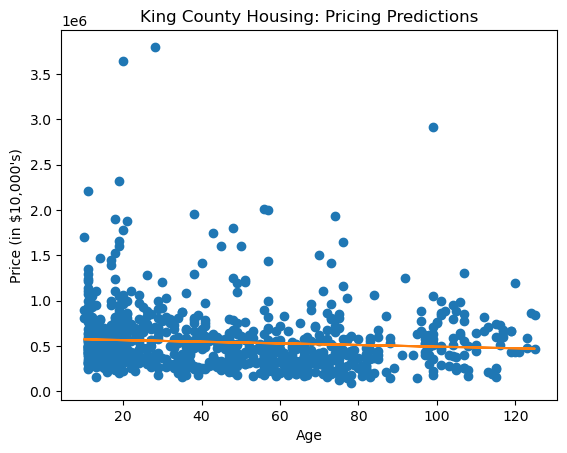

In [263]:
plt.plot(x_test['age'], y_test, 'o')
m, b = np.polyfit(x_test['age'], predicted_home_prices_test, 1)
plt.plot(x_test['age'], m*x_test['age']+b)
plt.title("King County Housing: Pricing Predictions")
plt.xlabel("Age")
plt.ylabel("Price (in $10,000's)")
plt.show()